In [0]:
#importando as bibliotecas necessarias
import pandas as pd
import io
import requests
import matplotlib.pyplot as plt
import numpy
import gzip
import seaborn as sns

In [0]:
#carrega o data-set
url = "http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2020-01-21/data/listings.csv.gz"
response = requests.get(url)
bytes_io = io.BytesIO(response.content)
with gzip.open(bytes_io, 'rt') as read_file:
    ds = pd.read_csv(read_file)

In [0]:
#informa a quantidade de linha e de colunas
print(ds.shape)

In [0]:
ds.head(5)

In [0]:
#apaga as colunas que não uteis
ds = ds.drop(['id', 'listing_url','scrape_id', 'last_scraped', 'name','summary', 'space', 'description', 'neighborhood_overview', 'notes','transit','access','interaction','house_rules',
              'thumbnail_url','medium_url', 'picture_url','xl_picture_url','host_id','host_url','host_name', 'host_about','host_thumbnail_url','host_picture_url', 'host_verifications',
              'calendar_last_scraped','first_review','last_review','license','jurisdiction_names', 'cancellation_policy','zipcode'], axis=1)

In [0]:
print(ds.shape)

In [0]:
ds.head(5)

In [0]:
ds = ds.drop(['host_acceptance_rate','neighbourhood_group_cleansed'], axis=1)

In [0]:
ds = ds.drop(['monthly_price'], axis=1)

In [0]:
ds.info()

In [0]:
#remove o simbolo monetario de um determinado campo
def remove_simbolo_monetario(x):
    a =  x[1:] #remove apenas um caracter
    result = ""
    for i in a:
        if i.isdigit() is True:
            result = result + i
    return result #retorna os digíto, sem o símbolo

ds["price"] = pd.to_numeric(ds["price"].apply(remove_simbolo_monetario), errors= "ignore")
ds["extra_people"] = pd.to_numeric(ds["extra_people"].apply(remove_simbolo_monetario), errors= "ignore")

In [0]:
#pega a tabela e transforma os dados em codigo
ds['bed_type'] = ds.bed_type.astype('category')
ds['bed_type'].cat.categories
ds['bed_type'] = ds['bed_type'].cat.codes

In [0]:
ds.head(5)

In [0]:
#pega a tabela e transforma os dados em codigo
ds['room_type'] = ds.room_type.astype('category')
ds['room_type'].cat.categories
ds['room_type'] = ds['room_type'].cat.codes

In [0]:
ds.head(20)

In [0]:
#plotando o grafico da coluna price
plt.figure(figsize = (7,7))
sns.set(style = "whitegrid")
f = sns.distplot(ds["price"])

In [0]:
#realizando o calculo do quantile
q1 = ds["price"].quantile(0.25)
q3 = ds["price"].quantile(0.75)
IQR = q3 - q1
IF = q1 - (1.5 * IQR)
OF = q3 + (1.5 * IQR)

In [0]:
ds = ds[~((ds["price"] < IF) | (ds["price"] > OF))]
ds.shape

In [0]:
#plotando o grafico da coluna price
plt.figure(figsize = (7,7))
sns.set(style = "whitegrid")
f = sns.distplot(ds["price"])

In [0]:
#plotando o mapa de calor
plt.figure(figsize=(27,27))
sns.heatmap(ds.corr(), annot=True)

In [0]:
#Verificando os tipos númericos existentes
list(set(ds.dtypes.tolist()))

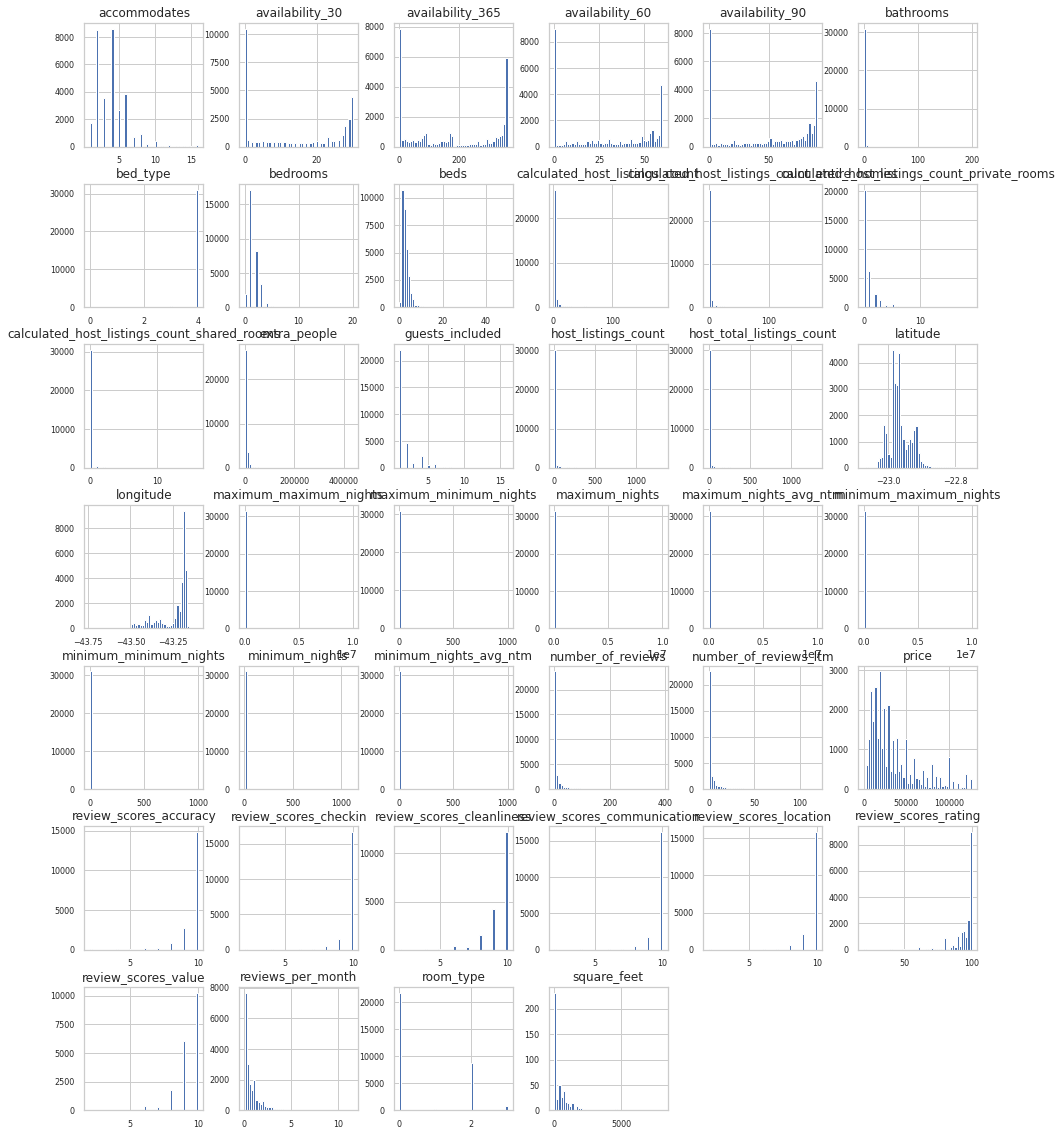

In [23]:
#Selecionando somente os tipos númericos e verificando a distribuição de seus dados
df_num = ds.select_dtypes(include = ['float64', 'int64', 'int8'])

df_num.head()
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

In [24]:
#Verificação de correlação entre as variávies e a price. Quais variávies impactam no valor do imóvel?
df_num_corr = df_num.corr()['price'][:-1] # -1 pois a última linha é a Price
golden_features_list = df_num_corr[abs(df_num_corr) > 0.1].sort_values(ascending=False)
print("There is {} strongly correlated values with price:\n{}".format(len(golden_features_list), golden_features_list))

There is 13 strongly correlated values with price:
price                                           1.000000
bedrooms                                        0.436359
accommodates                                    0.390812
square_feet                                     0.354249
beds                                            0.255648
bathrooms                                       0.222481
guests_included                                 0.104676
longitude                                      -0.131013
number_of_reviews                              -0.169648
calculated_host_listings_count_private_rooms   -0.178112
latitude                                       -0.183757
number_of_reviews_ltm                          -0.197525
room_type                                      -0.327253
Name: price, dtype: float64


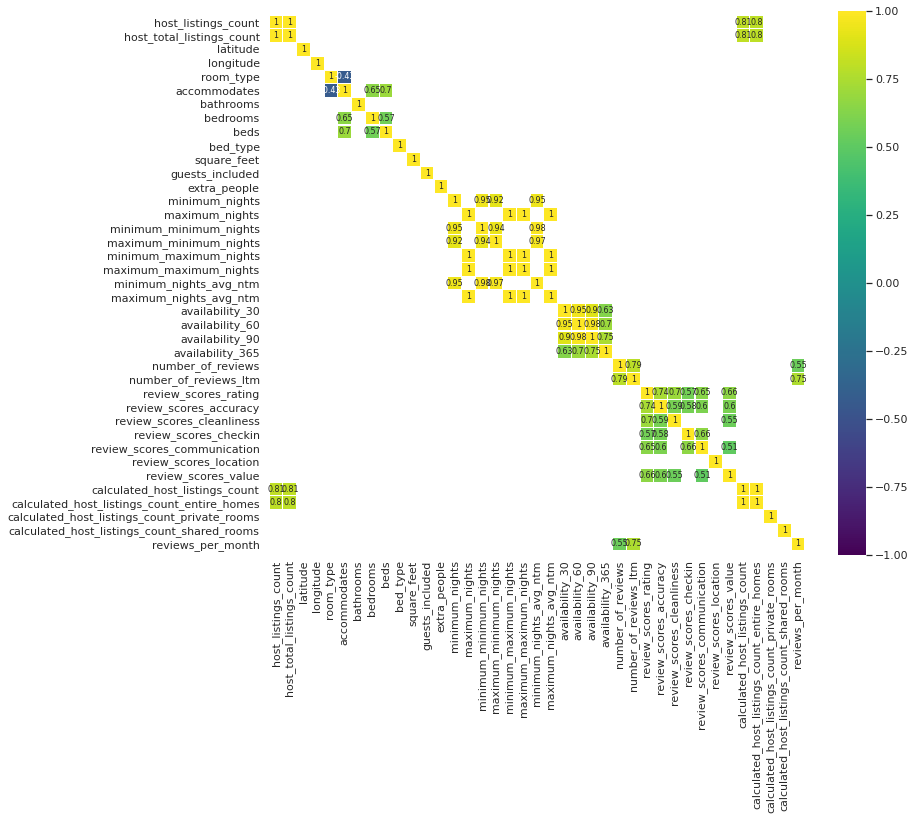

In [25]:
#Correlação entre as variáveis
import seaborn as sns

corr = df_num.drop('price', axis=1).corr() # We already examined SalePrice correlations
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

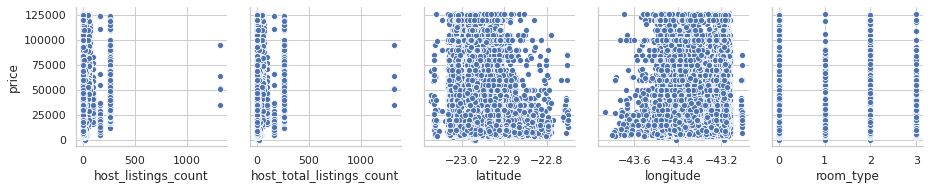

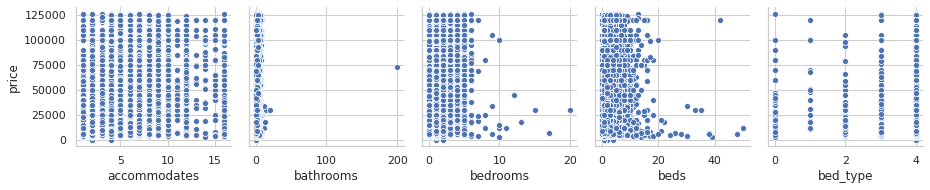

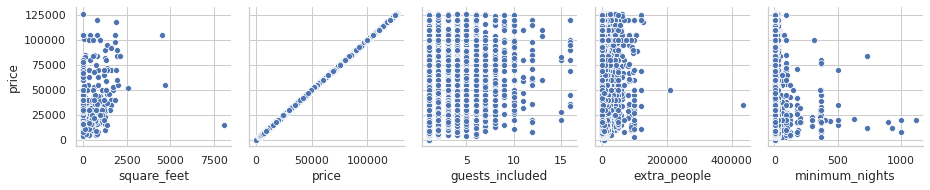

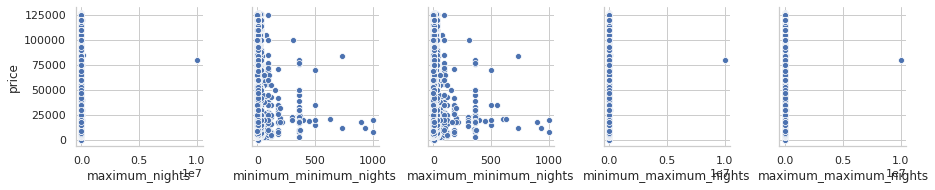

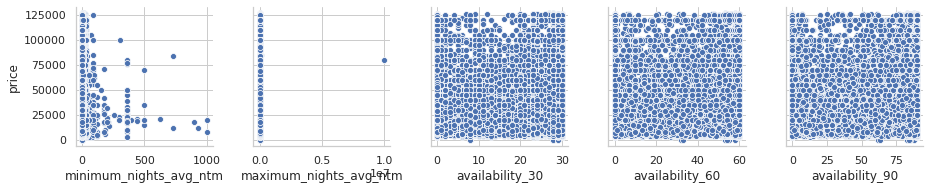

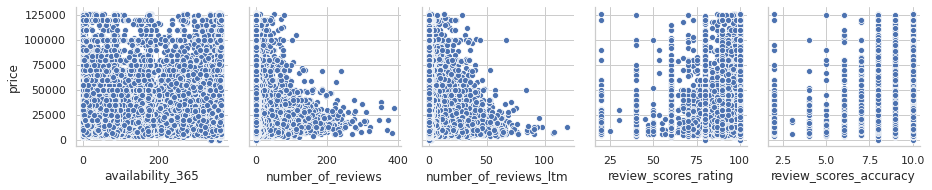

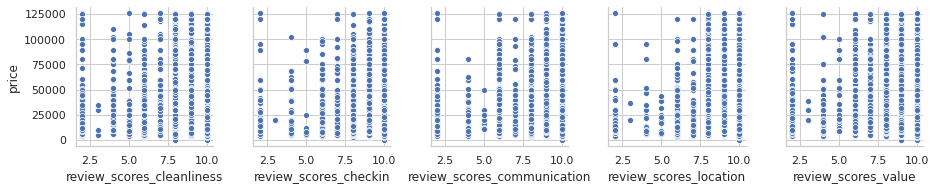

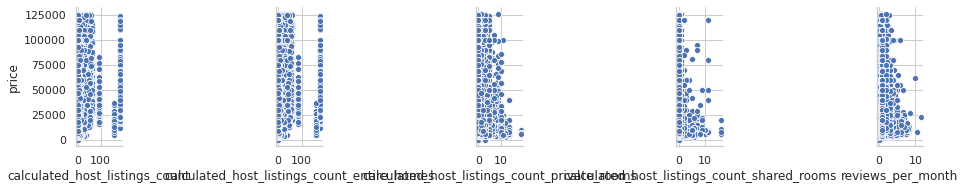

In [26]:
#Observando a distribuição de dados de cada coluna numérica em relação à price
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+5],
                y_vars=['price'])

In [0]:
#Escolha de algumas variáveis a partir da correlação
ds["accommodates"] = pd.to_numeric(ds["accommodates"], errors= "ignore")
ds["bathrooms"] = pd.to_numeric(ds["bathrooms"], errors= "ignore")
ds["bedrooms"] = pd.to_numeric(ds["bedrooms"], errors= "ignore")
ds["beds"] = pd.to_numeric(ds["beds"], errors= "ignore")
ds["room_type"] = pd.to_numeric(ds["room_type"], errors= "ignore")

ds["review_scores_location"] = pd.to_numeric(ds["review_scores_location"], errors= "ignore")

In [0]:
ds = ds.dropna()

In [0]:
#Colunas do treinamento e a label price procurada
x = ds[['accommodates', 'bathrooms','bedrooms','beds','room_type']]
y = ds["price"]

In [31]:
x.isnull().any()
x.shape

(61, 5)

In [32]:
y.isnull().any()
y.shape

(61,)

In [33]:
x

,accommodates,bathrooms,bedrooms,beds,room_type
5,2,1.0,1.0,1.0,0
7,1,1.0,1.0,1.0,2
85,4,1.0,0.0,3.0,0
102,2,1.5,1.0,1.0,2
147,4,2.5,2.0,2.0,0
...,...,...,...,...,...
1637,5,2.0,1.0,3.0,0
1718,4,2.0,2.0,2.0,0
1846,4,2.0,2.0,4.0,0
1884,4,1.5,1.0,4.0,0


In [0]:
#Separação dos conjunto de treinamento e teste
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold

# rkf.split(X)
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30)
#random_state = 12883823
#rkf = RepeatedKFold(n_splits=2, n_repeats=2, random_state=random_state)
#x_train, x_test,y_train,y_test = rkf.split(x)

In [35]:
#Aplicação do Regressão Linear
#from sklearn.ensemble import RandomForestRegressor
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

#rf = RandomForestRegressor(n_estimators = 1500, verbose=1, criterion='mse')
rf = linear_model.LinearRegression()
rf.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
x_test

,accommodates,bathrooms,bedrooms,beds,room_type
390,3,1.0,1.0,1.0,0
782,7,1.0,3.0,5.0,0
896,2,1.0,2.0,2.0,0
598,1,3.0,1.0,1.0,2
182,2,1.0,1.0,1.0,0
790,4,1.0,2.0,4.0,0
85,4,1.0,0.0,3.0,0
1030,2,1.0,1.0,1.0,0
341,4,1.5,2.0,3.0,0
1042,3,1.0,1.0,2.0,0


In [0]:
#Predição
pred = rf.predict(x_test)

In [40]:
print("Conjunto de predições:\n {}".format(pred))

Conjunto de predições:
 [24718.68097669 31766.69178101 32528.95547056 21416.12332121
 26295.75049447 30264.69535828 18243.22486776 26295.75049447
 31039.85555988 25163.62043833 19820.29438554 35339.02116365
 41572.22613974 14513.71568878 16535.72466821 32704.89468478
 26053.49936163 26841.55607529 44012.42546623]


In [41]:
# coeficientes
print('Coeficientes: \n', rf.coef_)
# mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, pred))
# Coeficiente de determinação: 1 é a predição perfeita
print('Coeficiente de determinação: %.2f'
      % r2_score(y_test, pred))

Coeficientes: 
 [-1577.06951779  2440.1993265   5788.26551444   444.93946165
 -5668.54767202]
Mean squared error: 518897798.61
Coeficiente de determinação: 0.28


In [44]:
pred.shape

(19,)

In [45]:
x_test.shape

(19, 5)

In [46]:
y_test.shape

(19,)

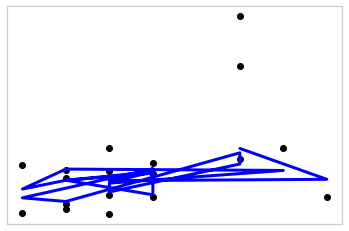

In [47]:
#Plotagem da regressão
plt.scatter(x_test['accommodates'], y_test,  color='black')
plt.plot(x_test['accommodates'], pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

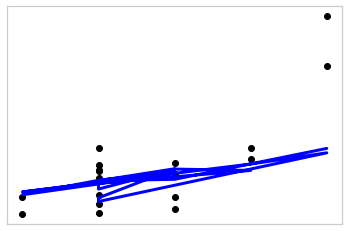

In [48]:
plt.scatter(x_test['bedrooms'], y_test,  color='black')
plt.plot(x_test['bedrooms'], pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [49]:
#Salvando o modelo
import pickle

filename = 'finalized_model.sav'
pickle.dump(rf, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_test, y_test)
print(result)

0.2755529268966128
